#Quiz 3
**Aaron Wiegand, aaron.wiegand@jhu.edu, github: hwiegan1**

In [6]:
#Question 1 - logistic regression

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import statsmodels as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

## this sets some style parameters
sns.set()

## Download in the data if it's not already there
! if [ ! -e orings.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("orings.csv")

#show the data
dat.head(4)


,Unnamed: 0,Temperature,Erosion,Blowby,Total
0,1,53,3,2,5
1,2,57,1,0,1
2,3,58,1,0,1
3,4,63,1,0,1


Text(0, 0.5, 'O-ring Failure = 1')

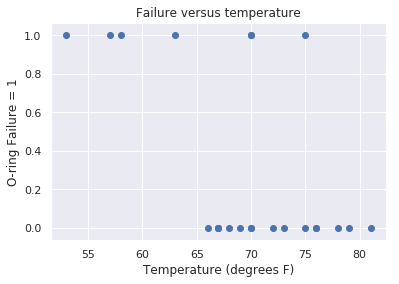

In [7]:
#Plot whether there was any o-ring failure (total > 0) versus temperature.

total = dat['Total']
temperature = dat[['Temperature']]

#fix the failure array to remove the 5 term
for n in total:
  if total[n] == 5:
    total[n] = 1


#make the plt
plt.figure()
plt.scatter(temperature, total)
plt.title('Failure versus temperature')
plt.xlabel('Temperature (degrees F)')
plt.ylabel('O-ring Failure = 1')
  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(beta0,beta1) =  [14.861927086730814, -0.22950051284078993]


Text(0.5, 1.0, 'Logistic curve fit to data')

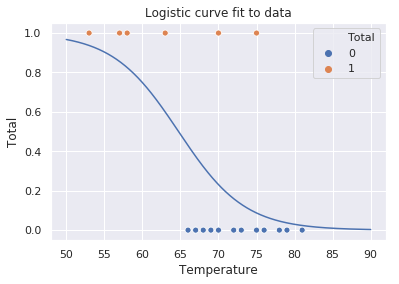

In [8]:
#Fit a logistic regression curve of o-ring failure (outcome) versus temperature.

#define the predictor and the outcome
x = temperature
y = total

x = x.to_numpy()
x = x.reshape(-1,1)
y = y.to_numpy()
y = y.reshape(-1,1)

# Initialize seed
np.random.seed(10)

#don't need testing/training data since the data set is so small

#fit the data using the linear regression model
regr = linear_model.LogisticRegression(solver ='lbfgs')
fit = regr.fit(x,y)

##find the regression coefficients
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
print('(beta0,beta1) = ',[beta0, beta1])


#define the equation for the line
xplot = np.linspace(50,90,1000)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

#Plot the estimated sigmoid curve from the logistic regression fit on your plot from a.
sns.scatterplot('Temperature', 'Total', data = dat, hue = 'Total')
sns.lineplot(xplot, p)
plt.title('Logistic curve fit to data')



In [9]:
#A new oring has a temperature of 74 degrees. What is the estimated probability of failure from your model?

temp = 74

#define the sigmoid curve
f = (np.exp(beta0 + temp*beta1)) /(1 + np.exp(beta0 + temp*beta1))
print('The estimated probability of failure for an oring with temp 74 degrees is ',f)
     
                                    

The estimated probability of failure for an oring with temp 74 degrees is  0.10706182602611801


#2. Consider the Logistic Regression Model

**a. Write out the log likelihood that we would maximize to obtain estimates of the parameters.**

log likelihood = $n\beta_0\overline{y}(1-x_i) + \beta_1(\sum_{i=1}^{n}x_iy_i) - \sum_{i=1}^{n}{log(1+e^{(\beta_0(1-x_i)+\beta_1x_i)})}$



**b. Split the log likelihood into two parts, one where $X_i = 0 $ and one where $X_i = 1$.**

when $X_i = 0 $, log likelihood = $n\beta_0\overline{y_0} - \sum_{i=1}^{n}{log(1+e^{\beta_0})}$

when $X_i = 1 $, log likelihood = $\beta_1(\sum_{i=1}^{n}y_i)- \sum_{i=1}^{n}{log(1+e^{\beta_1})}$

**c. Argue that the estimates are $\hat{\beta_0} = log(\frac{\overline{y_0}}{1-\overline{y_0}})$, and $\hat{\beta_1} = log(\frac{\overline{y_1}}{1-\overline{y_1}})$ where $\overline{Y_0}$ is the proportion of 1's where $X_i = 0$ and $\overline{Y_1}$ is the proportion of 1's where $X_i = 1$.**


**For $X_i = 0$:**

log likelihood = $\text{*} = n\beta_0\overline{y_0} - \sum_{i=1}^{n}{log(1+e^{\beta_0})} = n\beta_0\overline{y_0} - nlog(1+e^{\beta_0})$

Maximize $\text{*} $ by setting $\frac{\partial}{\partial \beta_0}(\text{*}) = 0 = n\overline{y_0} - \frac{ne^{\beta_0}}{1+e^{\beta_0}}$

Solving for $\overline{y_0}$ we get $\overline{y_0} = \frac{e^{\hat{\beta_0}}}{1+e^{\hat{\beta_0}}}$

Now solve for $\hat{\beta_0}$:

$\overline{y_0} = \frac{e^{\hat{\beta_0}}}{1+e^{\hat{\beta_0}}}\cdot{\frac{\frac{1}{e^{\hat{\beta_0}}}}{\frac{1}{e^{\hat{\beta_0}}}}} = \frac{1}{e^{-{\hat{\beta_0}}} + 1}$

$\frac{1}{\overline{y_0}} = e^{-{\hat{\beta_0}}} + 1$

therefore
$e^{-{\hat{\beta_0}}} = \frac{1}{\overline{y_0}} -1 = \frac{1-\overline{y_0}}{\overline{y_0}}$

taking $ln$ of both sides we get $\hat{\beta_0} = log(\frac{\overline{y_0}}{1-\overline{y_0}})$


**We do the same thing for $X_i = 1$:**

log likelihood = $\text{*} = \beta_1(\sum_{i=1}^{n}y_i) - \sum_{i=1}^{n}{log(1+e^{\beta_1})} = n\beta_1\overline{y_1} - nlog(1+e^{\beta_1})$

Maximize $\text{*} $ by setting $\frac{\partial}{\partial \beta_1}(\text{*}) = 0 = n\overline{y_1} - \frac{ne^{\beta_1}}{1+e^{\beta_1}}$

Solving for $\overline{y_1}$ we get $\overline{y_1} = \frac{e^{\hat{\beta_1}}}{1+e^{\hat{\beta_1}}}$

Now solve for $\hat{\beta_1}$:

$\overline{y_1} = \frac{e^{\hat{\beta_1}}}{1+e^{\hat{\beta_1}}}\cdot{\frac{\frac{1}{e^{\hat{\beta_1}}}}{\frac{1}{e^{\hat{\beta_1}}}}} = \frac{1}{e^{-{\hat{\beta_1}}} + 1}$

$\frac{1}{\overline{y_1}} = e^{-{\hat{\beta_1}}} + 1$

therefore
$e^{-{\hat{\beta_1}}} = \frac{1}{\overline{y_1}} -1 = \frac{1-\overline{y_1}}{\overline{y_1}}$

taking $ln$ of both sides we get $\hat{\beta_1} = log(\frac{\overline{y_1}}{1-\overline{y_1}})$









In [13]:
#3. Dataset for analysis

#this data was taken from: https://www.kaggle.com/kumarajarshi/life-expectancy-who

# Download the dataset
! if [ ! -e Life%Expectancy%Data.csv ]; \
then wget https://raw.githubusercontent.com/hwiegan1/DataScience/master/Life%20Expectancy%20Data.csv; \
fi;

# Read in the data and display a few rows
df = pd.read_csv("Life Expectancy Data.csv")

#print the first ten rows
df.head(10)


--2019-09-19 22:29:35--  https://raw.githubusercontent.com/hwiegan1/DataScience/master/Life%20Expectancy%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333442 (326K) [text/plain]
Saving to: ‘Life Expectancy Data.csv’

Life Expectancy Dat 100%[===================>] 325.63K  --.-KB/s    in 0.03s   

2019-09-19 22:29:36 (10.7 MB/s) - ‘Life Expectancy Data.csv’ saved [333442/333442]



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
